In [5]:
import matplotlib.pyplot as plt
import numpy as np
import threading
import os

Here, relating the pseudocode to $c, z$ and $f_{c}$:
$ \\
    f_c(z) = z^2 + c \\
    z = x + {\rm i}y \\
    z^2 = x^2 + 2{\rm i}xy - y^2
    c = x_0 + {\rm i}y_0
$

and so, as can be seen in the pseudocode in the computation of $x$ and $y$:
$ \\
x = \mathrm{Re}(z^2 + c) = x^2 - y^2 + x_0  \\
y = \mathrm{Im}(z^2 + c) = 2xy + y_0  \\
$

To get colorful images of the set, the assignment of a color to each value of the number of executed iterations can be made using one of a variety of functions (linear, exponential, etc.).



# Pseudocode

for each pixel (Px, Py) on the screen do 
    x0 := scaled x coordinate of pixel (scaled to lie in the Mandelbrot X scale (-2.00, 0.47))  
    y0 := scaled y coordinate of pixel (scaled to lie in the Mandelbrot Y scale (-1.12, 1.12))  
    x := 0.0  
    y := 0.0  
    iteration := 0  
    max_iteration := 1000  
    while (x^2 + y^2 ≤ 2^2 AND iteration < max_iteration) do  
        xtemp := x^2 - y^2 + x0  
        y := 2*x*y + y0 
        x := xtemp 
        iteration := iteration + 1 

color := palette[iteration]  
plot(Px, Py, color) 

In [6]:
def initializeMatrix(height, width):
    x_min, x_max = -2.0, 0.47
    y_min, y_max = -1.12, 1.12
    
    X0 = np.linspace(x_min, x_max, width)
    Y0 = np.linspace(y_min, y_max, height)

    m_values, n_values = np.meshgrid(X0, Y0, indexing='ij')
    matrix = np.zeros((height, width), dtype=np.complex128)
    
    matrix = m_values + 1j * n_values
    
    return matrix, X0, Y0


def values(Px, Py, max_iteration):
    x, y = 0, 0
    iteration = 0
    #max_iteration = 1000
    while ((x*x + y*y) <= 4) and iteration < max_iteration:
        xtemp = x*x - y*y + Px
        y = 2*x*y + Py
        x = xtemp 
        iteration += 1
        
    return iteration


def values_vectorized(matrix0):
    max_iteration = 1000
    matrix = np.zeros_like(matrix0)
    result_matrix = np.zeros(matrix0.shape, dtype=float)

    for i in range(max_iteration):
        #mask = np.less_equal(matrix.real**2 + matrix.imag**2, 4)
        #result_matrix += mask.astype(float)
        
        #matrix = np.where(mask, matrix*matrix + matrix0, matrix)
        
        matrix = matrix*matrix + matrix0
        
    return matrix 
    

In [7]:
zac_matrika, _, _ = initializeMatrix(10, 10)

end_matrika = values_vectorized(zac_matrika)



C:\Users\mitri\AppData\Local\Temp\ipykernel_11568\3327737282.py:40: RuntimeWarning: overflow encountered in multiply
  matrix = matrix*matrix + matrix0
C:\Users\mitri\AppData\Local\Temp\ipykernel_11568\3327737282.py:40: RuntimeWarning: invalid value encountered in multiply
  matrix = matrix*matrix + matrix0


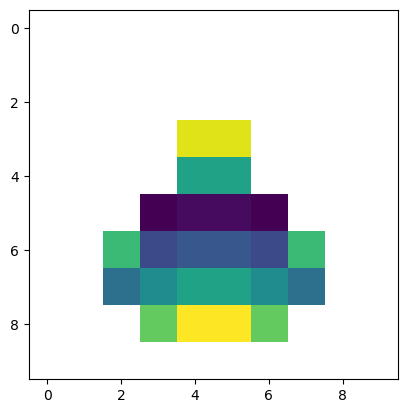

In [8]:
plt.imshow(np.real(end_matrika))
plt.show()

In [9]:
from queue import Queue
import threading

def worker(resultMatrix, ind1, ind2, Px, Py, max_iteration):
    x, y = 0, 0
    iteration = 0
    #max_iteration = 1000
    while ((x*x + y*y) <= 4) and iteration < max_iteration:
        xtemp = x*x - y*y + Px
        y = 2*x*y + Py
        x = xtemp 
        iteration += 1
    
    #print(iteration)
    resultMatrix[ind1, ind2] = iteration
    #return iteration

    
def runMandelbrot(threads, height, width, max_iteration):
    #queue = Queue()
    
    # Lock for thread-safe access to the results array
    lock = threading.Lock()
    
    matrika0, M_sez, N_sez = initializeMatrix(height, width)
    #for index in range(1, height+width):
    #    queue.put(index)
    
    threads = []
    resultMatrix = np.zeros((height, width), dtype=float)

    for ind1, M in enumerate(M_sez):
        for ind2, N in enumerate(N_sez):
            #print(M, N)
            thread = threading.Thread(target=worker, 
                args=(resultMatrix, ind1, ind2, M, N, max_iteration))
            threads.append(thread)

    for thread in threads:
        thread.start()

    for thread in threads:
        thread.join()
        
    return resultMatrix
        
        


In [10]:
matrikaMandelbrot = runMandelbrot(10000, 1000, 1000, 1000)

print(matrikaMandelbrot)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


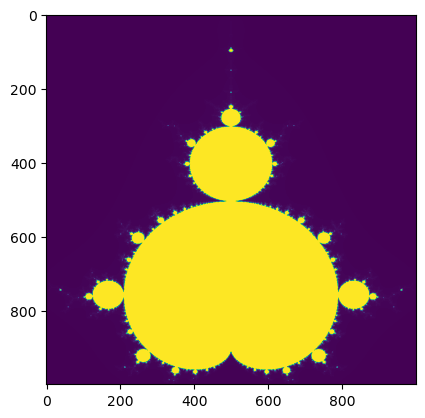

In [11]:
plt.imshow(matrikaMandelbrot)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (r1,r2,np.array([[mandelbrot(complex(r, i),max_iter) for r in r1] for i in r2]))

def plot_mandelbrot(xmin,xmax,ymin,ymax,width,height,max_iter):
    img_width, img_height = width, height
    r1, r2, mandelbrot_set = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,max_iter)
    plt.figure(figsize=(10,10))
    plt.imshow(mandelbrot_set.T, extent=[xmin, xmax, ymin, ymax])
    plt.title("Mandelbrot Set")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.show()

# Define the range and resolution for the Mandelbrot set
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
width, height = 1000, 1000
max_iter = 255

# Plot the Mandelbrot set
plot_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter)

UnboundLocalError: cannot access local variable 'mandelbrot_set' where it is not associated with a value